# FrozenPy Validation: Synthetic data

To make sure that FrozenPy is correctly detecting freezing and averages slices correctly we can test is using ground-truth, synthetic data. 

First, we need to import necessary packages.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

path = '/Users/home/Documents/Jupyter/FrozenPy'
os.chdir(path)
import FrozenPy_test as fp

## Generate synthetic data

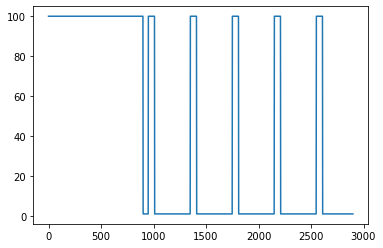

In [13]:
# Motion data. higher values = higher motion
fs = 5
bl = np.ones(180*fs)*100  # not freezing
cs1 = np.ones(10*fs)      # freezing
cs2 = np.ones(10*fs)*100  # not freezing
us = np.ones(2*fs)*100    # not freezing
isi = np.ones(58*fs)      # freezing


# concatenate into one array
synth_data = np.concatenate([bl,
              cs1,cs2,us,isi,
              cs1,cs2,us,isi,
              cs1,cs2,us,isi,
              cs1,cs2,us,isi,
              cs1,cs2,us,isi]
                      )

# np array -> pd dataframe
synth_dict = {'test': synth_data}
synth_df = pd.DataFrame(synth_dict)
synth_df.head()

# plot
plt.plot(synth_df.values)

## Detect freezing

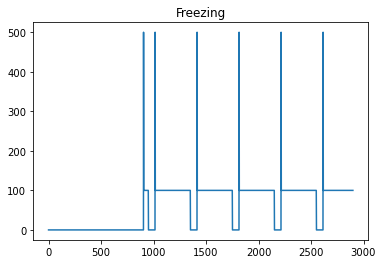

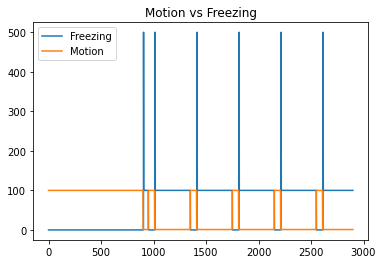

In [16]:
# detect freezing
frz_df = fp.detect_freezing(synth_df)

# plot freezing. (0: not freezing, 100: freezing, 500: begin freezing)
plt.figure()
plt.plot(frz_df.xs('Freezing').values)
plt.title('Freezing')

# plot w/synthetic data to compare
plt.figure()
plt.plot(frz_df.xs('Freezing').values)
plt.plot(synth_data)
plt.title('Motion vs Freezing')
plt.legend(['Freezing','Motion'])


## Slice data

In [11]:
frz_bl, frz_cs, frz_isi = fp.get_averagedslices_flight(frz_df,BL=180,SCS=[10,10],US=2,ISI=58,
                                          Trials=5,fs=1,Behav='Freezing',Group=[])
display(frz_bl)
display(frz_cs)
display(frz_isi)

,ID,BL
0,test,0.0


,ID,Trial,CS type,CS Freezing
0,test,1,Tone,100.0
1,test,2,Tone,100.0
2,test,3,Tone,100.0
3,test,4,Tone,100.0
4,test,5,Tone,100.0
5,test,1,Noise,0.0
6,test,2,Noise,0.0
7,test,3,Noise,0.0
8,test,4,Noise,0.0
9,test,5,Noise,0.0


,ID,Trial,ISI,US
0,test,1,100.0,0.0
1,test,2,100.0,0.0
2,test,3,100.0,0.0
3,test,4,100.0,0.0
4,test,5,100.0,0.0
